# Convert drawing to points as a numpy array

In [1]:
import numpy as np
from PIL import Image
from pathlib import Path
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors

## Definitions

In [2]:
dir_name = Path('drawings_points') / 'drawings'
# image_name = 'point_draw_mountain_1.png'
image_name = '2hc.png'
img_path = dir_name / image_name
num_of_points_to_sample = 100

## Algorithm

In [3]:
def draw_to_points(img_path, num_of_points_to_sample):
    # load the image 
    img = Image.open(img_path)
    # convert to grayscale
    img = img.convert('L')
    # convert to numpy array
    img_array = np.asarray(img)
    # normalize the image
    img_array = img_array - img_array.min()
    img_array = img_array / img_array.max()
    # # reverse black and white
    img_array = 1 - img_array
    pixel_probability = img_array.flatten() / img_array.sum()

    # sampler
    points_chosen = np.random.choice(img_array.size, size=num_of_points_to_sample, p=pixel_probability)
    points_img = [indx in points_chosen for indx in range(img_array.shape[0] * img_array.shape[1])]
    points_img = np.array(points_img).reshape(img_array.shape)


    y, x = np.where(points_img)
    res_points = np.stack((x, -y), axis=1)
    res_points = res_points - res_points.min(axis=0)
    res_points = res_points / (res_points.max(axis=0)).max()
    # center the points
    res_points = res_points - res_points.mean(axis=0)

    np.random.shuffle(res_points)
    return res_points
    


## Create the points

In [4]:
res_points = draw_to_points(img_path, num_of_points_to_sample)

## Show the resulting points

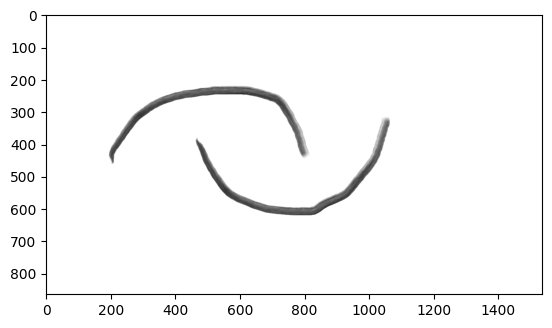

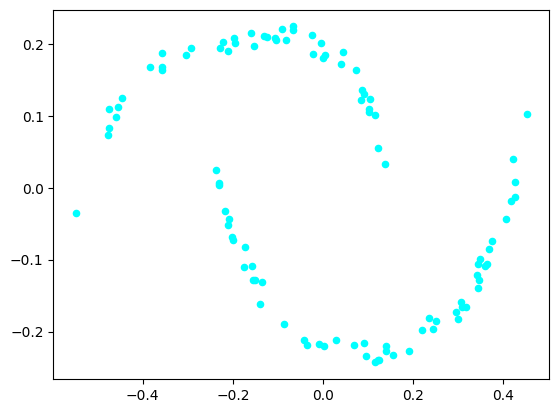

In [5]:
img = Image.open(img_path)
plt.imshow(img)
plt.show()
plt.scatter(res_points[:,0], res_points[:,1], s=20, c='aqua' , marker='o')
plt.show()

In [6]:
mcolors.cnames.keys()


dict_keys(['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lights